<img src="http://oproject.org/tiki-download_file.php?fileId=6&display">

## includes

In [1]:
#include<TRInterface.h>
#include<TCanvas.h>
#include<TGraph.h>
#include<TRandom.h>
#include<TMath.h>
#include<TVectorD.h>

ROOT::R::TRInterface &r=ROOT::R::TRInterface::Instance();

### ROOTR Minimizer Example:
Thisis a simple example using random points with gauss distribution. 

Calling R with command result <- optim( initialparams, minfunction,method='BFGS',control = list(ndeps=stepsizes,maxit=1000,trace=0,abstol=1.000000e-02),hessian=TRUE)
Value at minimum =142.98

****************************************
Minimizer is RMinimizer / BFGS
Chi2                      =       142.98
NDf                       =           95
NCalls                    =          109
Constant                  =      130.876   +/-   5.62344     
Mean                      =   0.00909781   +/-   0.0109261   
Sigma                     =     0.931933   +/-   0.0269208    	 (limited)


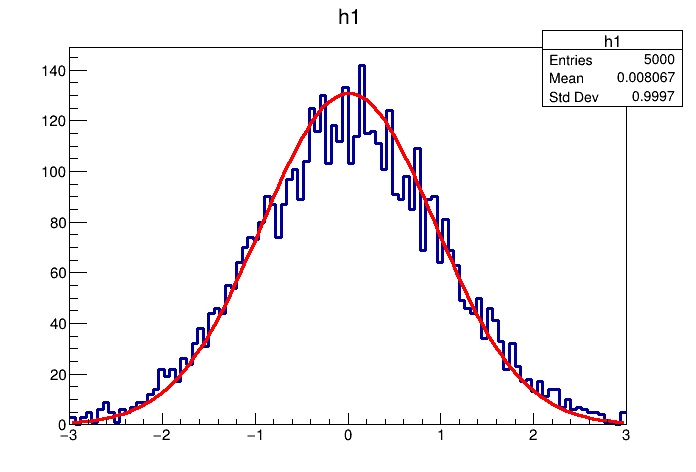

In [2]:
TCanvas  *c=new TCanvas("c");
TH1D h1("h1","h1",100,-3,3);
h1.FillRandom("gaus");
ROOT::Math::MinimizerOptions::SetDefaultMinimizer("RMinimizer","BFGS");
h1.Fit("gaus");
c->Draw();

## Simple fitting in R and plot in ROOT
The next example creates an exponential fit. 
The idea is to create a set of numbers x,y with noise from ROOT, 
pass them to R and fit the data to x^3 using nls(Nonlinear Least Squares), 
get the fitted coefficient(power) and plot the data, 
the known function and the fitted function using ROOT's classes.

In [3]:
TCanvas *c1 = new TCanvas("c1","Curve Fitting",700,500);
c1->SetGrid();
// draw a frame to define the range
TMultiGraph *mg = new TMultiGraph();
const Int_t n = 24;
Double_t x[n] ;
Double_t y[n] ;

## Creating data
Generate the points along a $X^3$ with noise
and creating the first graph (points with gaussian noise)

In [4]:
TRandom rg;
rg.SetSeed(520);
for (Int_t i = 0; i < n; i++) {
      x[i] = rg.Uniform(0, 1);
      y[i] = TMath::Power(x[i], 3) + rg.Gaus() * 0.06;
}

TGraph *gr1 = new TGraph(n,x,y);
gr1->SetMarkerColor(kBlue);
gr1->SetMarkerStyle(8);
gr1->SetMarkerSize(1);
mg->Add(gr1);

## Ploting
creating the second plot

In [5]:
TF1 *f_known=new TF1("f_known","pow(x,3)",0,1);
TGraph *gr2 = new TGraph(f_known);
gr2->SetMarkerColor(kRed);
gr2->SetMarkerStyle(8);
gr2->SetMarkerSize(1);
mg->Add(gr2);

## Passing Data to R environment
passing data to R for fitting

In [6]:
TVectorD vx(n, x);
TVectorD vy(n, y);
r["x"]=vx;
r["y"]=vy;
r<<"ds<-data.frame(x=x,y=y)";

## Fitting using NLS(Nonlinear Least Squares)

In [7]:
r<<"m <- nls(y ~ I(x^power),data = ds, start = list(power = 1),trace = T)";

1.506598 :  1
0.3263132 :  1.885851
0.09498773 :  2.719307
0.0764783 :  3.086762
0.07622443 :  3.136312
0.07622369 :  3.139027
0.07622369 :  3.139151


In [8]:
Double_t power;
r["summary(m)$coefficients[1]"]>>power;

## Ploting
plotting the fitted function

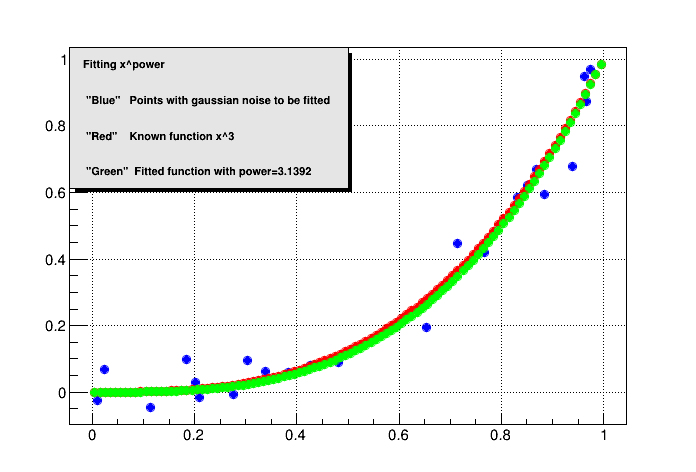

In [9]:
TF1 *f_fitted=new TF1("f_fitted","pow(x,[0])",0,1);
f_fitted->SetParameter(0,power);

TGraph *gr3 = new TGraph(f_fitted);
gr3->SetMarkerColor(kGreen);
gr3->SetMarkerStyle(8);
gr3->SetMarkerSize(1);

mg->Add(gr3);
mg->Draw("ap");
TPaveText *pt = new TPaveText(0.1,0.6,0.5,0.9,"brNDC");
pt->SetFillColor(18);
pt->SetTextAlign(12);
pt->AddText("Fitting x^power ");
pt->AddText(" \"Blue\"   Points with gaussian noise to be fitted");
pt->AddText(" \"Red\"    Known function x^3");
TString fmsg;
fmsg.Form(" \"Green\"  Fitted function with power=%.4lf",power);
pt->AddText(fmsg);
pt->Draw();   
c1->Update();
c1->Draw();